In [1]:
%load_ext autoreload
%autoreload 2
import sys

import pandas as pd

sys.path.append("../..")

from mlstm_kernels.utils.benchmark.plot_results import (
    plot_benchmark_result_table,
    rc_context_wrapper,
    select_columns,
)
from pathlib import Path
from plot_config import linestyle_mapping, style_dict
import pickle

In [2]:
# Collect all results batch size 1
# falconmamba_gen_file = "/home/beck/wdir/dev_repos/mlstm_kernels/outputs_kernel_benchmarks_final/2024-12-05_13-57-50__gen_time__gentime_falconmamba_cgmtrue_v0/hf_7B_generation_time__pfl0_bs1_tcTrue_weightdtypebfloat16/results.csv"

# codestralmamba_gen_file = "/home/beck/wdir/dev_repos/mlstm_kernels/outputs_kernel_benchmarks_final/2024-12-05_15-43-18__gen_time__codestral_mamba_gen_cgmtrue_v0/hf_7B_generation_time__pfl0_bs1_tcTrue_weightdtypebfloat16/results.csv"

# mxlstmmamba_gen_file = "/home/beck/wdir/dev_repos/mlstm_kernels/outputs_kernel_benchmarks_final/2024-12-05_08-42-43__gen_time__genttime_xlstm_v1/hf_7B_generation_time__pfl0_bs1_tcTrue_weightdtypebfloat16/results.csv"

# llama_gen_file = "/home/beck/wdir/dev_repos/mlstm_kernels/outputs_kernel_benchmarks_final/2024-12-05_15-20-04__gen_time__llama_static_v0/hf_7B_generation_time__pfl0_bs1_tcTrue_weightdtypebfloat16/results.csv"

# file_dict = {
#     "falconmamba": falconmamba_gen_file,
#     "codestralmamba": codestralmamba_gen_file,
#     "llama": llama_gen_file,
#     "mxlstmmamba": mxlstmmamba_gen_file,
# }

sys.path.append(".")

from plot_results_for_paper import (
    plot_combined_benchmark_result_table,
    rc_context_wrapper,
    select_columns,
)
from plot_config import style_dict
import pickle
import matplotlib.pyplot as plt
from plot_config_for_paper import FIGSIZE_2COL

with open("gen_time_mem_data.p", "rb") as f:
    raw_data = pickle.load(f)

gen_mem_df = raw_data["gen_mem_gb"]
gen_time_df = raw_data["gen_time_seconds"]

In [3]:
gen_time_df

,P--generation_length,R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True,R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True,R--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16
0,64,0.993486,0.631431,0.461524,0.504170,0.407504
1,128,1.987225,1.264578,0.922830,1.014825,0.815703
2,512,7.946974,5.052857,3.902180,4.328458,3.266631
3,1024,15.902392,10.119249,8.549205,9.441146,6.526076
4,2048,31.808961,20.229658,19.323619,21.785773,13.043052
5,4096,63.615465,40.459223,48.119520,54.103895,26.087967
6,8192,127.224078,80.949203,133.775531,153.369484,52.179844
7,16384,254.442937,161.881500,418.571656,486.427781,104.342187


In [4]:
# file_dict = {
#     "falconmamba": falconmamba_gen_file,
#     "codestralmamba": codestralmamba_gen_file,
#     "llama": llama_gen_file,
#     "mxlstmmamba": mxlstmmamba_gen_file,
# }

pd.read_csv("../../outputs_kernel_benchmarks/2025-03-26_15-28-46__gen_time__testvllm/hf_7B_generation_time__pfl0_bs1_tcFalse_weightdtypebfloat16/results.csv")

,Unnamed: 0,P--batch_size,P--prefill_length,P--rep,P--warmup,P--benchmark_fn_context_manager,P--generation_length,R--llama2__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--llama2__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--llama3__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--llama3__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False
0,0,1,0,1,1,inference_mode,64,457.758667,76414488064,487.090027,73386098176,613.070740,50440018944,533.500671,20122076160
1,1,1,0,1,1,inference_mode,128,907.927002,76414488064,965.497925,73386098176,1152.135254,50440018944,1048.931152,20122076160
2,2,1,0,1,1,inference_mode,256,1800.718262,76414488064,1920.787476,73386098176,2232.613525,50440018944,2082.544678,20122076160
3,3,1,0,1,1,inference_mode,512,3591.666016,76414488064,3834.920898,73386098176,4393.176270,50440018944,4148.394531,20122076160
4,4,1,0,1,1,inference_mode,1024,7227.818359,76414488064,7691.464355,73386098176,8722.783203,50440018944,8278.613281,20122076160
5,5,1,0,1,1,inference_mode,2048,14632.913086,76414488064,15375.945312,73386098176,17388.160156,50440018944,16540.138672,20122076160
6,6,1,0,1,1,inference_mode,4096,29974.220703,76414488064,31291.554688,73386098176,33701.902344,50440018944,33077.531250,20122076160
7,7,1,0,1,1,inference_mode,8192,NaN,-1,63890.636719,73386101248,66531.757812,50440018944,66188.132812,20122076672
8,8,1,0,1,1,inference_mode,16384,NaN,-1,140110.312500,73386103296,272015.500000,50440018944,185767.921875,20122076672


In [5]:
df_base = pd.read_csv("../../outputs_kernel_benchmarks/2025-03-26_15-28-46__gen_time__testvllm/hf_7B_generation_time__pfl0_bs1_tcFalse_weightdtypebfloat16/results.csv")
df_base = df_base[df_base["P--generation_length"] != 256 ].reset_index(drop=True)

dataframe_dicts = [
    df_base.filter(regex="R.*llama3") / 1000.,
    df_base.filter(regex="R.*codestral") / 1000.,
    df_base.filter(regex="R.*falcon") / 1000.,
    df_base.filter(regex="R.*llama2") / 1000.
]

dataframe_dicts = [
    df.rename(columns={df.columns[0]:df.columns[0]+"_vllm"})
    for df in dataframe_dicts
]


# dataframe_dict = {
#     k: (
#         pd.read_csv(v).filter(regex=".*generation|.*R--.*"),
#         pd.read_csv(v).filter(regex=".*generation|.*M--.*"),
#     )
#     for k, v in file_dict.items()
# }

In [6]:
df_base

,Unnamed: 0,P--batch_size,P--prefill_length,P--rep,P--warmup,P--benchmark_fn_context_manager,P--generation_length,R--llama2__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--llama2__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--llama3__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--llama3__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,M--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False
0,0,1,0,1,1,inference_mode,64,457.758667,76414488064,487.090027,73386098176,613.070740,50440018944,533.500671,20122076160
1,1,1,0,1,1,inference_mode,128,907.927002,76414488064,965.497925,73386098176,1152.135254,50440018944,1048.931152,20122076160
2,3,1,0,1,1,inference_mode,512,3591.666016,76414488064,3834.920898,73386098176,4393.176270,50440018944,4148.394531,20122076160
3,4,1,0,1,1,inference_mode,1024,7227.818359,76414488064,7691.464355,73386098176,8722.783203,50440018944,8278.613281,20122076160
4,5,1,0,1,1,inference_mode,2048,14632.913086,76414488064,15375.945312,73386098176,17388.160156,50440018944,16540.138672,20122076160
5,6,1,0,1,1,inference_mode,4096,29974.220703,76414488064,31291.554688,73386098176,33701.902344,50440018944,33077.531250,20122076160
6,7,1,0,1,1,inference_mode,8192,NaN,-1,63890.636719,73386101248,66531.757812,50440018944,66188.132812,20122076672
7,8,1,0,1,1,inference_mode,16384,NaN,-1,140110.312500,73386103296,272015.500000,50440018944,185767.921875,20122076672


In [7]:
# gen_time_df = pd.concat([v[0] for v in dataframe_dict.values()], axis=1)
# gen_time_df = pd.concat(
#     [
#         gen_time_df.filter(regex=".*generation.*").take([0], axis=1),
#         gen_time_df.filter(regex=".*R--.*") / 1e3,
#     ],
#     axis=1,
# )
# gen_time_df

In [8]:
# gen_mem_df = pd.concat([v[1] for v in dataframe_dict.values()], axis=1)
# gen_mem_df = pd.concat(
#     [
#         gen_mem_df.filter(regex=".*generation.*").take([0], axis=1),
#         gen_mem_df.filter(regex=".*M--.*") / 1e9,
#     ],
#     axis=1,
# )
# gen_mem_df

In [9]:
# raw_data = {
#     "gen_time_seconds": gen_time_df,
#     "gen_mem_gb": gen_mem_df,
# }
# with open("gen_time_mem_data.p", "wb") as f:
#     pickle.dump(raw_data, f)

# for k, v in raw_data.items():
#     v.to_csv(f"raw_data_{k}.csv")

In [10]:
# with open("gen_time_mem_data.p", "rb") as f:
#     raw_data = pickle.load(f)

# gen_mem_df = raw_data["gen_mem_gb"]
# gen_time_df = raw_data["gen_time_seconds"]

In [11]:
gen_time_df = pd.concat([gen_time_df, *dataframe_dicts], axis=1)

In [12]:
gen_time_df

,P--generation_length,R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True,R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True,R--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False,R--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16,R--llama3__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False_vllm,R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False_vllm,R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False_vllm,R--llama2__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False_vllm
0,64,0.993486,0.631431,0.461524,0.504170,0.407504,0.487090,0.613071,0.533501,0.457759
1,128,1.987225,1.264578,0.922830,1.014825,0.815703,0.965498,1.152135,1.048931,0.907927
2,512,7.946974,5.052857,3.902180,4.328458,3.266631,3.834921,4.393176,4.148395,3.591666
3,1024,15.902392,10.119249,8.549205,9.441146,6.526076,7.691464,8.722783,8.278613,7.227818
4,2048,31.808961,20.229658,19.323619,21.785773,13.043052,15.375945,17.388160,16.540139,14.632913
5,4096,63.615465,40.459223,48.119520,54.103895,26.087967,31.291555,33.701902,33.077531,29.974221
6,8192,127.224078,80.949203,133.775531,153.369484,52.179844,63.890637,66.531758,66.188133,NaN
7,16384,254.442937,161.881500,418.571656,486.427781,104.342187,140.110312,272.015500,185.767922,NaN


In [13]:
with open("gen_time_mem_data_vllm.p", "wb") as f:
    pickle.dump({"gen_time_seconds": gen_time_df}, f)


## Plotting the raw data

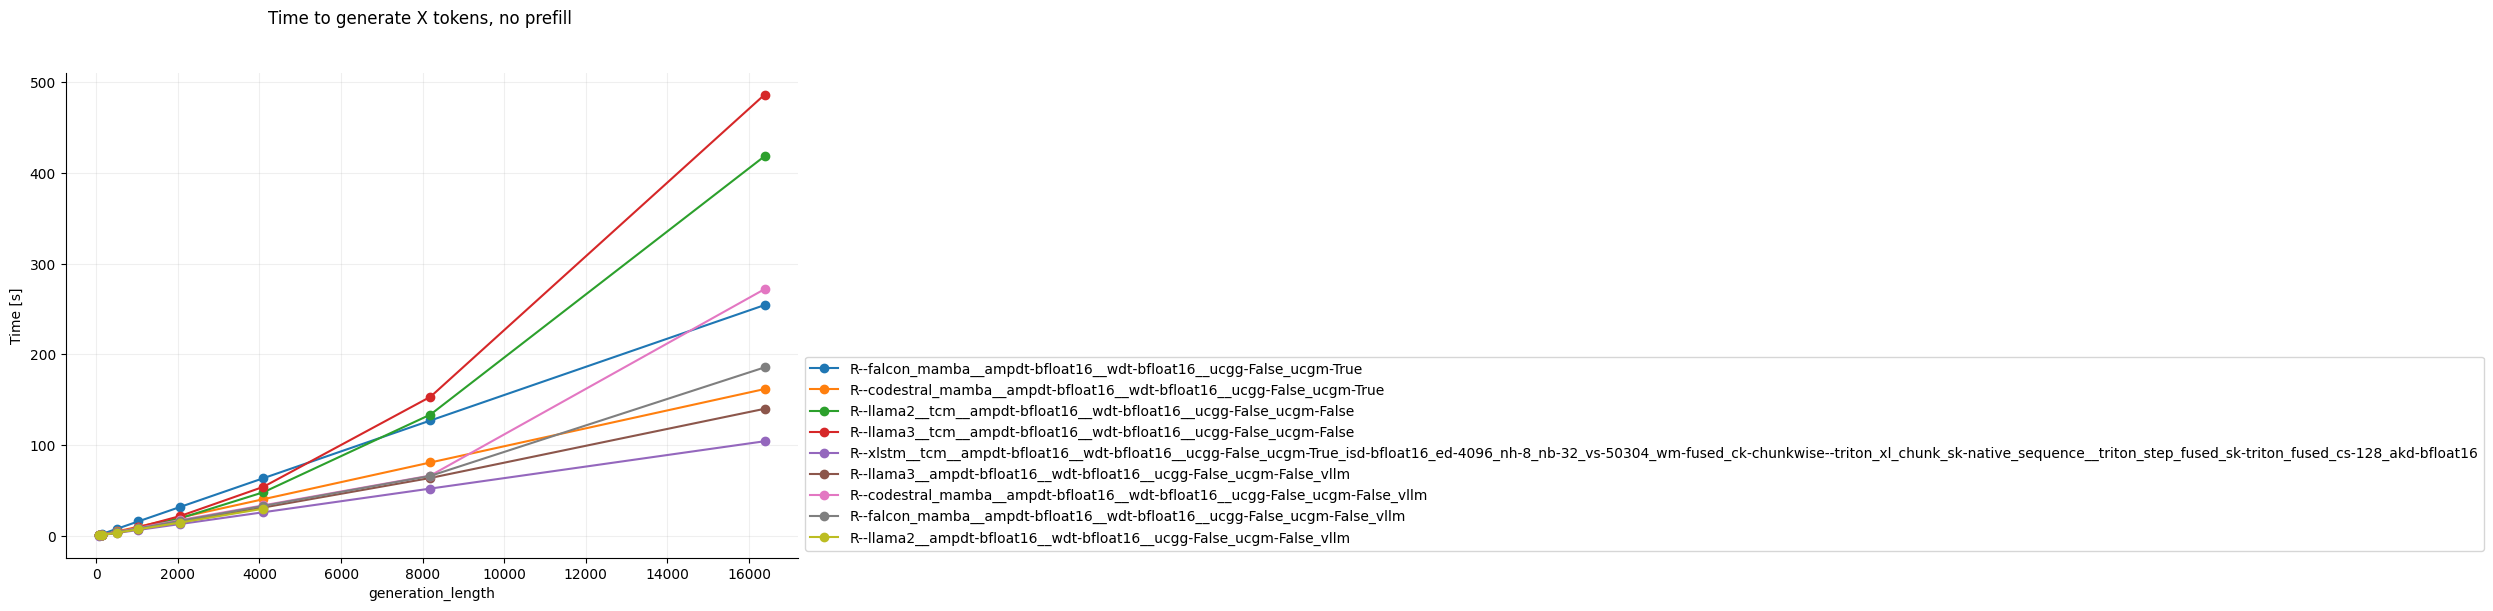

In [40]:
fig = plot_benchmark_result_table(
    gen_time_df,
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    # style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_label="Time [s]",
    title="Time to generate X tokens, no prefill",
)

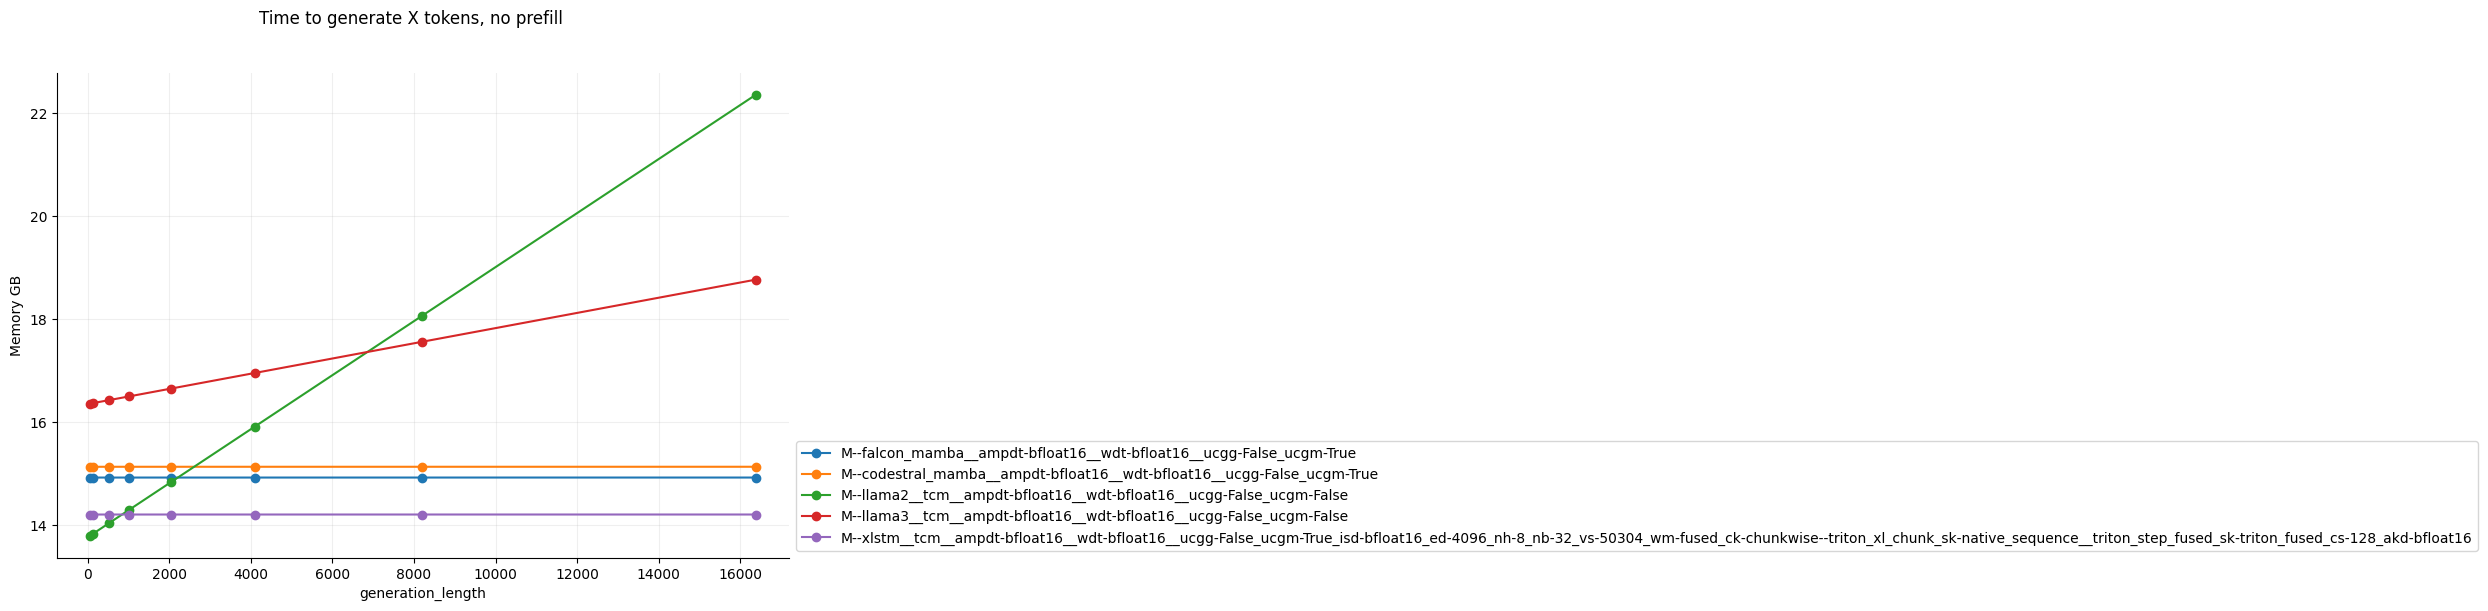

In [41]:
fig = plot_benchmark_result_table(
    gen_mem_df,
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    # style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_label="Memory GB",
    title="Time to generate X tokens, no prefill",
)

## Final Plots - All results

In [48]:
selected_columns_runtime = {
    "llama3": "R--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "llama2": "R--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "falcon_mamba": "R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "codestral_mamba": "R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "xlstm": "R--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16",
    "codestral_mamba_vllm": "R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False_vllm",
    "falcon_mamba_vllm": "R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False_vllm",
    "llama3_vllm": "R--llama3__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False_vllm",
    "llama2_vllm": "R--llama2__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False_vllm",
    
}
selected_columns_memory = {
    "llama2": "M--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "llama3": "M--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "falcon_mamba": "M--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "codestral_mamba": "M--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "xlstm": "M--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16",
}
filename_suffix = ""
add_legend = True

In [49]:
gen_time_plot_df = select_columns(
    gen_time_df, selected_columns_runtime, keep_col_regex=".*generation.*"
)

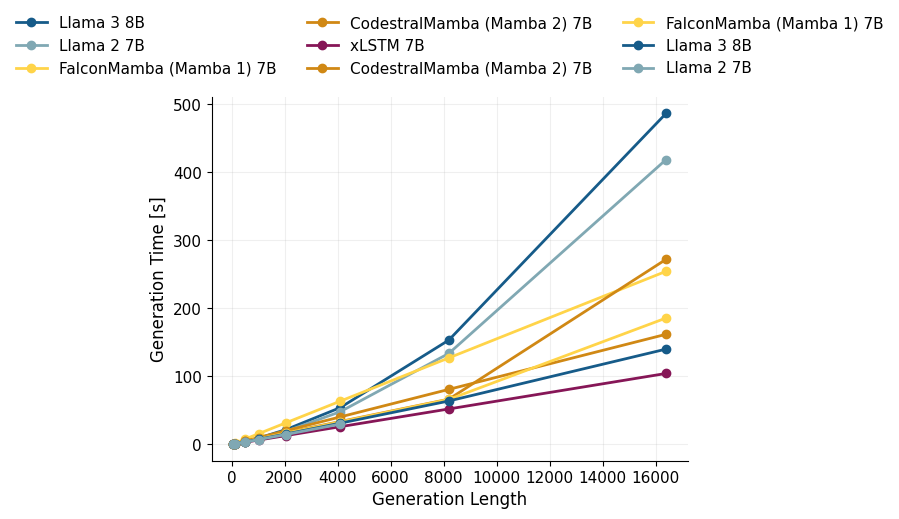

In [50]:
fig = rc_context_wrapper(
    func=plot_benchmark_result_table,
    result_df=gen_time_plot_df,
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_label="Generation Time [s]",
    x_label="Generation Length",
    title="",  # "Time to generate 1 tokens, for varying prefill lengths",
    figsize=(1.3 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54),
    filename=f"generation_time{filename_suffix}",
    add_legend=add_legend,
    legend_args={
        "loc": "lower center",
        "ncol": 3,
        "bbox_to_anchor": (0.0, 1.02, 1.0, 0.502),
        "frameon": False,
        "facecolor": "white",
    },
)

In [ ]:
gen_mem_plot_df = select_columns(
    gen_mem_df, selected_columns_memory, keep_col_regex=".*generation.*"
)

In [ ]:
fig = rc_context_wrapper(
    func=plot_benchmark_result_table,
    result_df=gen_mem_plot_df,
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_label="GPU Memory [GB]",
    x_label="Generation Length",
    title="",  # "Time to generate 100 tokens, for varying prefill lengths",
    figsize=(1.3 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54),
    filename=f"generation_memory{filename_suffix}",
    add_legend=False,  # add_legend,
    legend_args={
        "loc": "lower center",
        "ncol": 3,
        "bbox_to_anchor": (0.0, 1.02, 1.0, 0.502),
        "frameon": False,
        "facecolor": "white",
    },
)